/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


[*]Fitting svm model...(C=0.001,gamma=0.01)
[*]Fitting svm model...(C=0.001,gamma=0.1)
[*]Fitting svm model...(C=0.001,gamma=1.0)
[*]Fitting svm model...(C=0.001,gamma=100.0)
[*]Fitting svm model...(C=0.1,gamma=0.01)
[*]Fitting svm model...(C=0.1,gamma=0.1)
[*]Fitting svm model...(C=0.1,gamma=1.0)
[*]Fitting svm model...(C=0.1,gamma=100.0)
[*]Fitting svm model...(C=1.0,gamma=0.01)
[*]Fitting svm model...(C=1.0,gamma=0.1)
[*]Fitting svm model...(C=1.0,gamma=1.0)
[*]Fitting svm model...(C=1.0,gamma=100.0)
[*]Fitting svm model...(C=100.0,gamma=0.01)
[*]Fitting svm model...(C=100.0,gamma=0.1)
[*]Fitting svm model...(C=100.0,gamma=1.0)
[*]Fitting svm model...(C=100.0,gamma=100.0)
[*]C => relative with curve
[*]gamma => relative with soft/hard


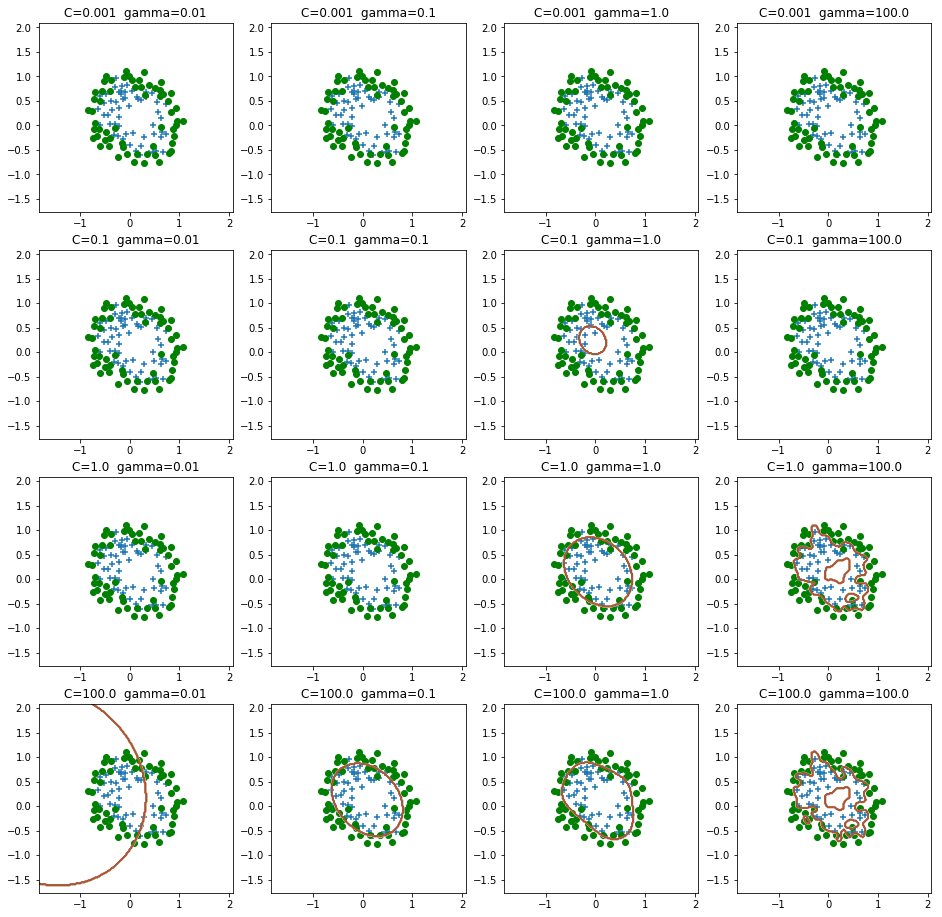

In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn import svm
import pandas as pd
%matplotlib inline
def get_data1():

    mu_vec1 = np.array([0,0])
    cov_mat1 = np.array([[2,0],[0,2]])
    x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)

    mu_vec2 = np.array([1,2])
    cov_mat2 = np.array([[1,0],[0,1]])
    x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)

    X = np.concatenate((x1_samples,x2_samples), axis = 0)
    Y = np.array([0]*100 + [1]*100)

    return X,Y

def get_data2(fname='07_svm_data.txt'):

    data = pd.read_csv(fname, header=None, names=('x1','x2','y'))
    X = data.ix[:,0:2].values
    Y = data.ix[:,2].values

    return X,Y

def plot_svm_predict(X,clf,h=.02):

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

class SVM():

    def __init__(self,C=1.0,kernel='rbf',gamma=0.7):
        self.clf = svm.SVC(kernel=kernel,gamma=gamma,C=C)

if __name__=='__main__':
    #get data
    data_func = get_data2
    X,Y=data_func()
    fig = plt.figure(figsize=(16,16))
    C=[0.001,0.1,1.0,100.0]
    gamma=[0.01,0.1,1.0,100.0]
    idx=1
    for c in C:
        for gam in gamma:
            plt.subplot(4,4,idx)
            plt.title('C={0}  gamma={1}'.format(c,gam))
            
            if data_func==get_data1:
                plt.scatter(X[:100][:,0],X[:100][:,1], marker='+')
                plt.scatter(X[100:][:,0],X[100:][:,1], c= 'green', marker='o')
            elif data_func==get_data2:
                plt.scatter(X[:,0][Y==1],X[:,1][Y==1], marker='+')
                plt.scatter(X[:,0][Y==0],X[:,1][Y==0], c= 'green', marker='o')

            print('[*]Fitting svm model...(C={0},gamma={1})'.format(c,gam))

            model = SVM(C=c, kernel='rbf', gamma=gam)
            model.clf.fit(X,Y)
            plot_svm_predict(X=X,clf=model.clf, h=0.02)
            idx+=1

    print('[*]C => relative with curve')
    print('[*]gamma => relative with soft/hard')
    
    plt.show()


